In [13]:
import os

import pandas as pd
from matplotlib import pyplot as plt

from simba_ml.prediction.time_series.data_loader import window_generator, splits
from simba_ml.prediction.time_series.config import time_series_config
from simba_ml.prediction.time_series.metrics import metrics

In [14]:
config = time_series_config.TimeSeriesConfig(input_features=['Infected'],
                                             output_features=['Infected'],
                                             input_length=7,
                                             output_length=7,)

In [15]:
data = pd.read_csv('covid.csv')
X_true, y_true = splits.train_test_split(data=[data],
                          test_split=0.26,
                          input_length=7,
                          split_axis='vertical')
# data = data.cumsum()

In [16]:
ode_data = pd.read_csv('sir_ode_forecast_1.csv')
# transform data: time point i = time point i - time point i-1
ode_data = ode_data.diff().dropna()
ode_data['time'] = list(range(0, len(ode_data)))
ode_data.to_csv(os.getcwd() + '/sir_ode_forecast_diff_transformed.csv', index=False)

_, ode_data_test = splits.train_test_split(data=[ode_data],
                          test_split=0.26,
                          input_length=7,
                          split_axis='vertical')

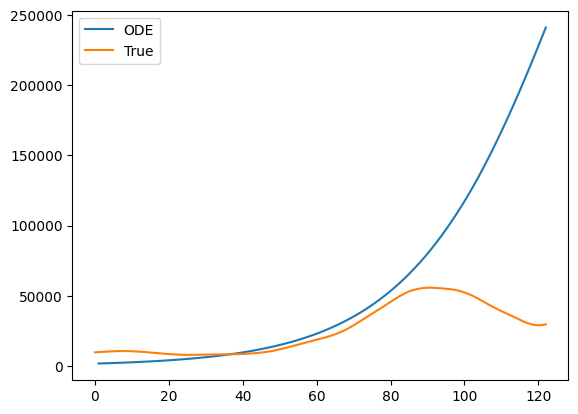

In [17]:
# normalize data
# data = data / data.max()
# £ode_data = ode_data / ode_data.max()
# plot data and ode data in a combined plot
plt.plot(ode_data['Infected'], label='ODE')
plt.plot(data['Infected'], label='True')
plt.legend()

In [18]:
X, y = window_generator.create_window_dataset(data_list=ode_data_test,
                                              config=config,)
X_true, y_true = window_generator.create_window_dataset(data_list=y_true,
                                                        config=config,)

In [19]:
metrics.test_input(y_true=y_true,
                   y_pred=y)

In [20]:
mae = metrics.mean_absolute_error(y_true=y_true,
                                  y_pred=y)

In [21]:
mae

108478.12804874503

In [22]:
pta = metrics.prediction_trend_accuracy(y_true=y_true,
                                        y_pred=y)

In [23]:
1-pta

0.9807692307692307

In [24]:
# combine mae and 1-pta into a dictionary and export as csv
pd.DataFrame.from_dict({'mean_absolute_error': [mae], '1-prediction_trend_accuracy': [1-pta]}).to_csv('ODE_prediction_1.csv', index=False)